##### Copyright 2025 Google LLC.

In [ ]:
# @title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Gemma - Run with Ollama Python library

Author: Onuralp Sezer

*   GitHub: [github.com/onuralpszr](https://github.com/onuralpszr/)
*   X: [@onuralpszr](https://x.com/onuralpszr)

Description: This notebook demonstrates how you can run inference on a Gemma3 model using  [Ollama Python library](https://github.com/ollama/ollama-python). The Ollama Python library provides the easiest way to integrate Python 3.8+ projects with Ollama.

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/google-gemini/gemma-cookbook/blob/main/Gemma/[Gemma_3]Using_with_Ollama_Python_Inference_with_Images.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

## Setup

### Select the Colab runtime
To complete this tutorial, you'll need to have a Colab runtime with sufficient resources to run the Gemma model. In this case, you can use a T4 GPU:

1. In the upper-right of the Colab window, select **▾ (Additional connection options)**.
2. Select **Change runtime type**.
3. Under **Hardware accelerator**, select **T4 GPU**.

## Installation

Install Ollama through the offical installation script.

In [ ]:
!sudo apt-get install pciutils
!curl -fsSL https://ollama.com/install.sh | sh

Install Ollama Python library through the official Python client for Ollama.

In [3]:
!pip install -q ollama

## Start Ollama

Start Ollama in background using nohup.

In [4]:
!nohup ollama serve > ollama.log &

nohup: redirecting stderr to stdout


## Prerequisites

*   Ollama should be installed and running. (This was already completed in previous steps.)
*   Pull the gemma3 model to use with the library: `ollama pull gemma3:4b`
    *  See [Ollama.com](https://ollama.com/) for more information on the models available.

In [1]:
import ollama

In [2]:
ollama.pull('gemma3:4b')

ProgressResponse(status='success', completed=None, total=None, digest=None)

## Inference with Text 📝 and Image 🖼️

Run inference using Ollama Python library.

In [3]:
!curl -A "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36" -o pexels-adria-masi-461420600-27372369.jpg "https://images.pexels.com/photos/27372369/pexels-photo-27372369.jpeg?cs=srgb&dl=pexels-adria-masi-461420600-27372369.jpg&fm=jpg&w=1280&h=856"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 84000  100 84000    0     0   173k      0 --:--:-- --:--:-- --:--:--  174k


### Image Preview (Optional) 🖼️

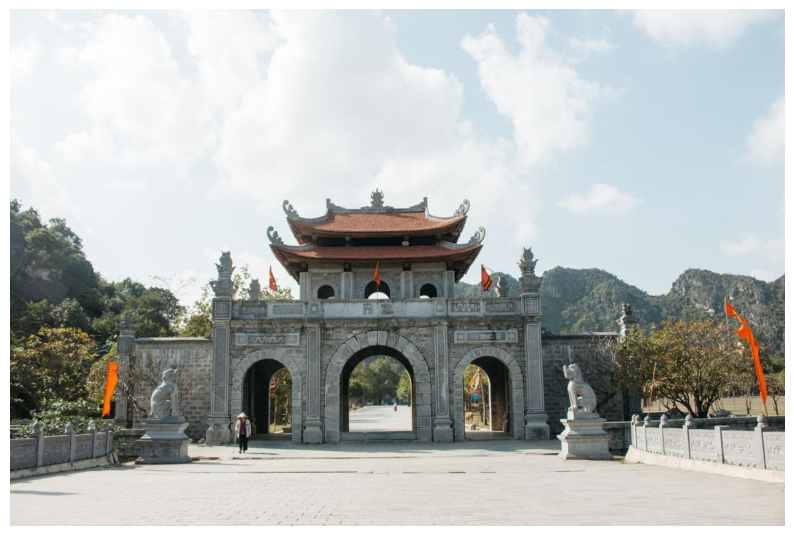

In [4]:
# Install opencv-python if needed
!pip install opencv-python matplotlib

import cv2
import matplotlib.pyplot as plt

# Load and display the image
img = cv2.imread('./img/sample.jpg')

# Convert from BGR (OpenCV default) to RGB (for proper display in matplotlib)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image
plt.figure(figsize=(10, 8))
plt.imshow(img_rgb)
plt.axis('off')  # Hide axis
plt.show()

### Generate

In [5]:
import ollama

res = ollama.chat(
	model="gemma3:4b",
	messages=[
		{
			'role': 'user',
			'content': 'Describe this image:',
			'images': ['./img/sample.jpg']
		}
	]
)

print(res['message']['content'])

Here's a description of the image:

**Overall Impression:**

The image showcases a grand, ancient stone entrance to a temple or shrine, likely in Southeast Asia. It’s a serene and imposing structure set against a backdrop of lush green hills.

**Key Elements:**

*   **The Entrance Structure:**  The focal point is a massive stone gateway, constructed with intricately carved details. It has a multi-arched design with large, arched openings. The stone is a weathered gray color.  A multi-tiered, red-tiled roof sits atop the arches.
*   **Roof:**  The roof is adorned with traditional Southeast Asian architectural elements, including decorative dragon motifs and curved eaves.
*   **Flags:** Red flags are mounted on tall poles to either side of the entrance, adding a vibrant color contrast.
*   **Background:**  Dense, dark green hills rise dramatically in the background, suggesting a mountainous setting.
*   **Pathway:** A paved pathway leads directly into the gateway, inviting the viewer to 

In [7]:
!wget https://ollama.com/public/blog/wordart.jpg

'wget' is not recognized as an internal or external command,
operable program or batch file.


#### Async client with OCR Usage 📝

To make asynchronous requests, use the `AsyncClient` class.

In [6]:
import asyncio
import nest_asyncio
from ollama import AsyncClient

nest_asyncio.apply()


async def generate():
    """
    Asynchronously generates a response to a given prompt using the AsyncClient.

    This function creates an instance of AsyncClient and sends a request to generate
    a response for the specified prompt. The response is then printed.
    """
    # Create an instance of the AsyncClient
    client = AsyncClient()

    # Send a request to generate a response to the prompt
    message={
    'role': 'user',
    'content': 'What does the text say ?',
    'images': ['./img/sample.jpg']}


    async for part in await AsyncClient().chat(model='gemma3:4b', messages=[message], stream=True):
      print(part['message']['content'], end='', flush=True)

# Run the generate function
asyncio.run(generate())

Based on the image, the text visible is:

**"ĐẠI HƯNG"**

This appears to be the name of a temple or monument in Vietnamese.

In [ ]:
!curl -A "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36" -o pexels-pixabay-60582.jpg "https://images.pexels.com/photos/60582/newton-s-cradle-balls-sphere-action-60582.jpeg?cs=srgb&dl=pexels-pixabay-60582.jpg&fm=jpg&w=1920&h=1346"

### Object Counting 🧾

In [10]:
from ollama import chat

# Start a conversation with the model
messages = [
    {
        "role": "user",
        "content": "How many Balls in the image and where are they?",
        "images": ["./img/sample.jpg"]
    },
]

# Get the model's response to the message
response = chat("gemma3:4b", messages=messages)
print(response["message"]["content"])

Okay, let's analyze the image to count the balls.

There are **six** balls in the image. They are on the flags flying from the roof of the building. 

If you'd like, you can send me another image to analyze!


In [13]:
from ollama import chat

prompt = """ArithmeticError
Your task is to act as a highly accurate data extraction assistant specializing in drilling reports. You will analyze the provided image, which is a daily drilling report.

Your specific objective is to **find and extract the Bit Dull Grading code**.

Follow these instructions precisely:

1.  **Locate the 'Bit Dull' Column:** Carefully examine the image. Identify the table column that has the header 'Bit Dull'. It might also be named 'Dull Grade', 'Bit Grade', or 'Bit Condition'.
2.  **Scan Only This Column:** Once you have located the correct column, focus your analysis *only* on the text contained within that column.
3.  **Identify the IADC Code Pattern:** Look for text within this column that strictly matches the IADC bit dull grading format. This format is a specific sequence:
    * **Number-Number-Letters-Letter-Character-Letters-Letters**
    * It typically looks like `N-N-LL-L-X-LL-LL` (where N=Number, L=Letter, X=Letter or Character).
    * **Examples:** `2-3-BT-N-F-RG-HP` or `1-2-WT-G-E-NO-FM`.
    * Focus on finding text with this **exact hyphenated structure**.
4.  **Extract the Code:** When you find text that matches this pattern within the identified column, extract it exactly as it appears in the image.
5.  **Be Strict:**
    * **Only** extract text that matches the described IADC pattern.
    * **Only** extract text from the 'Bit Dull' (or similarly named) column.
    * **Do not** provide any grading codes that are not explicitly visible in the image.
    * If you cannot find any text matching this specific pattern in the correct column, respond with: 'No bit dull grading found in the specified format.'

Now, analyze the provided image and extract the bit dull grading code."""

# Start a conversation with the model
messages = [
    {
        "role": "user",
        "content": prompt,
        "images": ["./img/sample1.jpg"],
    },
]

# Get the model's response to the message
response = chat("gemma3:4b", messages=messages)
print(response["message"]["content"])

121/20



## Conclusion 🏆

Congratulations! You have successfully run inference on a Gemma3 model using the Ollama Python library with VLM capabilities. You can now integrate this into your Python projects.